<a href="https://colab.research.google.com/github/SalshaAlAryandi/P3_1461900142/blob/main/coki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory('gdrive/My Drive/PetImages/', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 79 images belonging to 2 classes.


In [ ]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory('gdrive/My Drive/PetImages/', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 79 images belonging to 2 classes.


In [ ]:
''' container '''
model = tf.keras.models.Sequential()

In [ ]:
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))


''' flattening '''
model.add(tf.keras.layers.Flatten())



''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))



''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
3/3 [==============================] - 2s 663ms/step - loss: 0.7947 - accuracy: 0.4684 - val_loss: 0.7569 - val_accuracy: 0.5063
Epoch 2/25
3/3 [==============================] - 1s 532ms/step - loss: 0.7321 - accuracy: 0.5063 - val_loss: 0.6977 - val_accuracy: 0.5063
Epoch 3/25
3/3 [==============================] - 1s 485ms/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6887 - val_accuracy: 0.6203
Epoch 4/25
3/3 [==============================] - 1s 419ms/step - loss: 0.6905 - accuracy: 0.5443 - val_loss: 0.6875 - val_accuracy: 0.4937
Epoch 5/25
3/3 [==============================] - 1s 496ms/step - loss: 0.6918 - accuracy: 0.5063 - val_loss: 0.6845 - val_accuracy: 0.5570
Epoch 6/25
3/3 [==============================] - 1s 419ms/step - loss: 0.6835 - accuracy: 0.5696 - val_loss: 0.6750 - val_accuracy: 0.6835
Epoch 7/25
3/3 [==============================] - 1s 428ms/step - loss: 0.6923 - accuracy: 0.5063 - val_loss: 0.6701 - val_accuracy: 0.6962
Epoch 8/25
3/3 [====

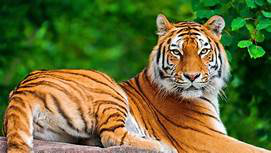

In [ ]:
''' plotting cat image '''
image.load_img('gdrive/My Drive/PetImages/klitoris/jembot.jpg')

In [ ]:
''' prediction '''
test_img = image.load_img('gdrive/My Drive/PetImages/klitoris/jembot.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis=0)

''' prediction '''
r = model.predict(img)
train_ds.class_indices

if r[0][0] == 1:
    pred = 'Harimau cok'
else:
    pred = 'Beruang Tempek'

print(pred)



Harimau cok


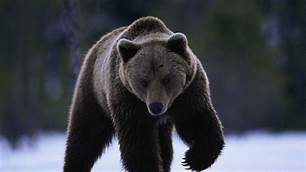

In [ ]:
''' plotting cat image '''
image.load_img('gdrive/My Drive/PetImages/Tempek/bangsat.jpg')

In [ ]:
''' prediction '''
test_img = image.load_img('gdrive/My Drive/PetImages/Tempek/bangsat.jpg', target_size = (64, 64))
''' converting image to array '''
img = image.img_to_array(test_img)
''' expanding dimension '''
img = np.expand_dims(img, axis=0)
''' prediction '''
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'Harimau cok'
else:
    pred = 'Beruang Tempek'

print(pred)



Beruang Tempek
